# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [112]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Challenge 1

#### The data we will use in this challenge is:

In [113]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

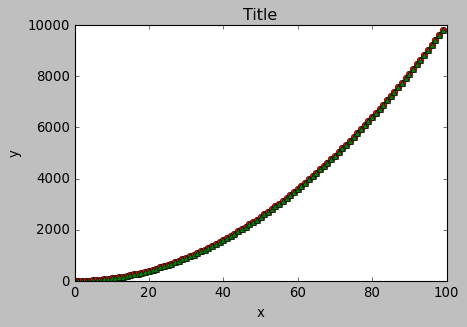

In [150]:
# Method 1
plt.figure(figsize=(6,4))

plt.plot(x,y, 'ro', x,z, '^g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

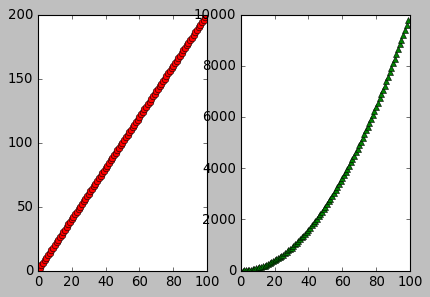

In [115]:
# Method 2
plot_options, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize= (6,4))

ax1.plot(x,y, 'ro')
ax2.plot(x,z, '^g')

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

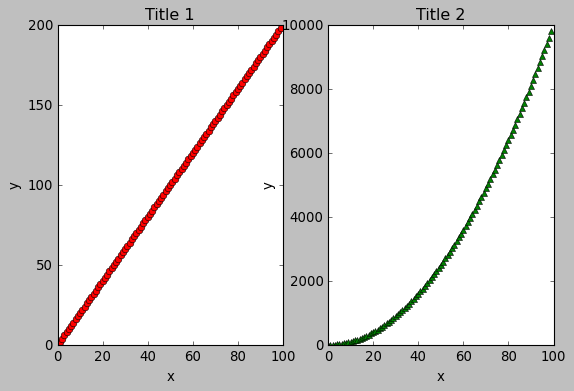

In [116]:
# your code here
plot_options, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize= (8,5))

ax1.plot(x,y, 'ro')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Title 1')

ax2.plot(x,z, '^g')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

ax2.set_title('Title 2')

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

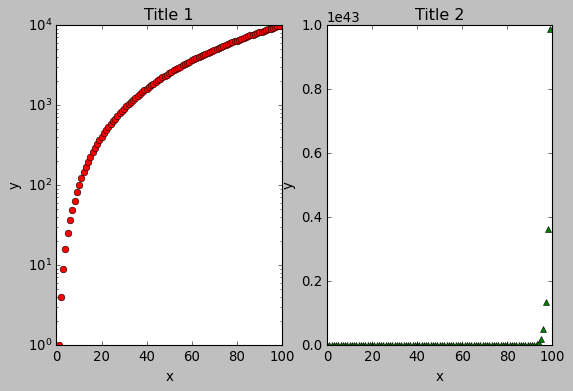

In [117]:
# your code here
y = x**2
y2 = np.exp(x)

plot_options, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize= (8,5))

ax1.plot(y, 'ro')
ax1.set_yscale('linear')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Title 1')

ax2.plot(y2, '^g')
ax1.set_yscale('log')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Title 2')

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

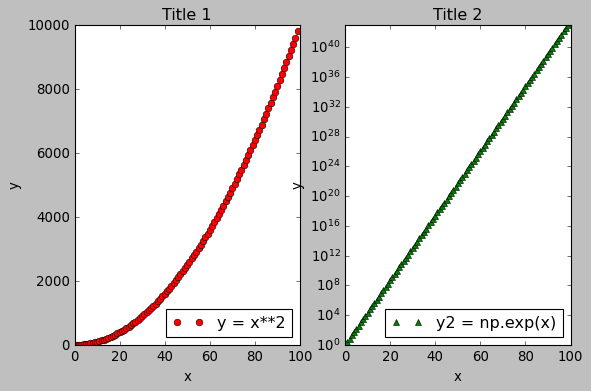

In [118]:
# your code here
plot_options, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize= (8,5))

ax1.plot(y, 'ro', label ='y = x**2')
ax1.legend(loc="lower right")
ax1.set_yscale('linear')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Title 1')

ax2.plot(y2, '^g', label ='y2 = np.exp(x)')
ax2.legend(loc="lower right")
ax2.set_yscale('log')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Title 2')

plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [119]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

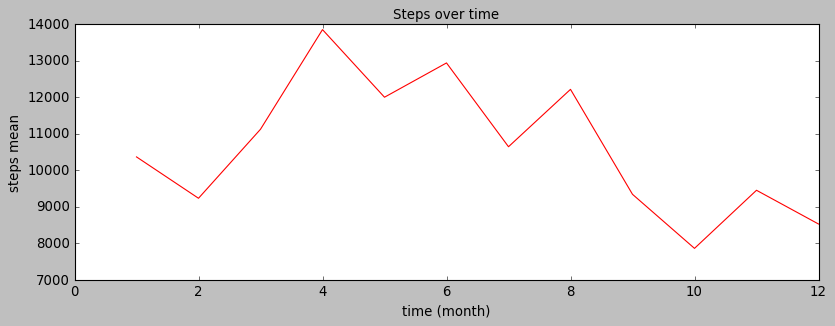

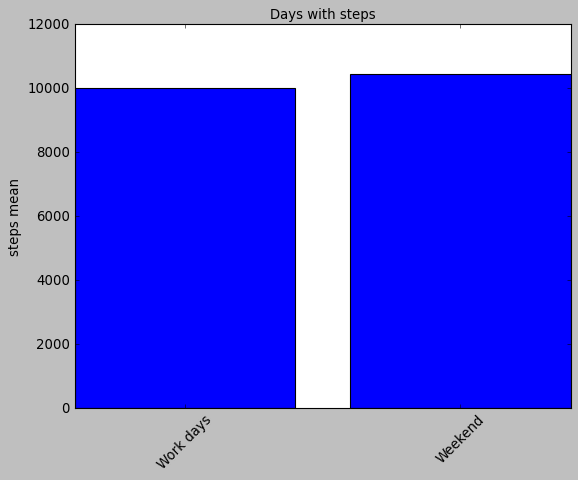

In [120]:
plt.figure(figsize=(12,4))

steps_month = fitbit.groupby(['Months_encoded']).agg({'Steps':'median'})
steps_day = fitbit.groupby('Work_or_Weekend').agg({'Steps':'median'}).reset_index()

# MEDIAN STEPS BY MONTH_ENCODED
# your code here
plt.plot(steps_month, 'r-')
plt.xlabel('time (month)', fontsize= 12)
plt.ylabel('steps mean', fontsize= 12)
plt.title('Steps over time', fontsize= 12)
plt.savefig('figures/steps_month.pdf')
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
plt.bar(steps_day['Work_or_Weekend'], steps_day['Steps'])
plt.ylabel(['Work days', 'Weekend'], fontsize= 12)
plt.ylabel('steps mean', fontsize= 12)
plt.title('Days with steps', fontsize= 12)
plt.xticks(steps_day['Work_or_Weekend'], ['Work days', 'Weekend'], fontsize= 12, rotation=45)

plt.savefig('figures/steps_days.pdf')
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [121]:
fitbit.head(2)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.0,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.4,92.086331,May,5


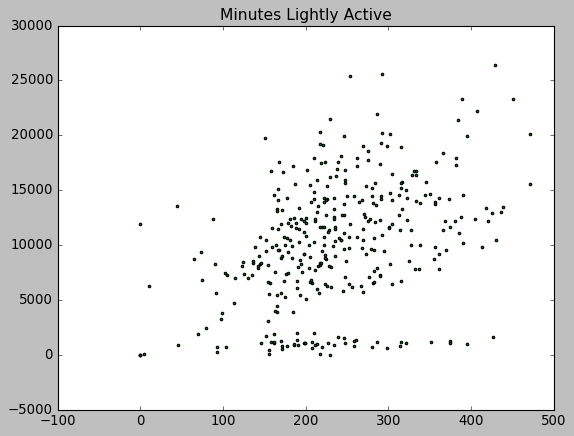

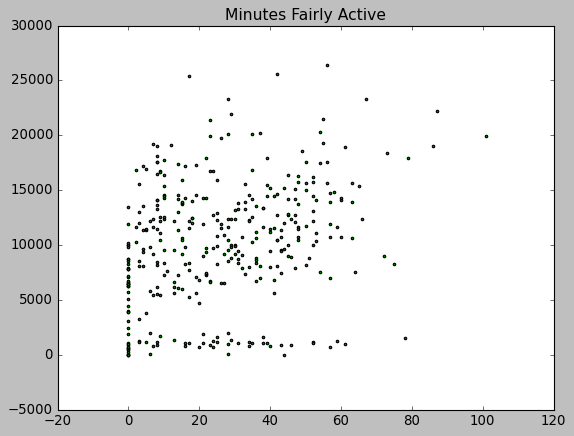

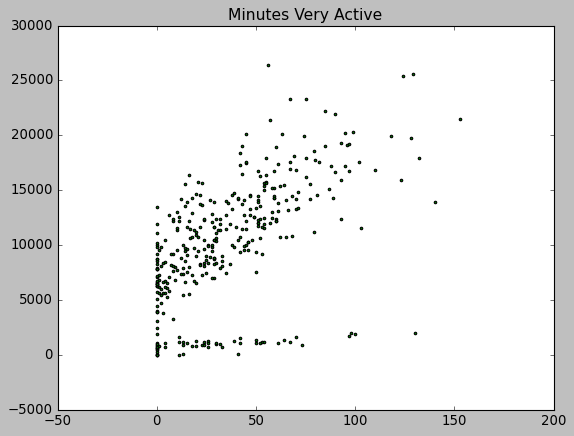

In [122]:
# your code here
for min_col in fitbit:
    if re.findall('Minutes \w+ Active', min_col):
#         print(min_col)
        plt.scatter(fitbit[f'{min_col}'], fitbit['Steps'], c='g', marker='.')
        plt.title(min_col, fontsize=14)
        plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [123]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [124]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [125]:
# NUMERICAL VARIABLES
# your code here
tita_num = titanic.select_dtypes(include=[int, float])
tita_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [126]:
# CATEGORICAL VARIABLES
# your code here
tita_cat = titanic.select_dtypes(exclude=[int, float])
tita_cat

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [152]:
# your code here
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

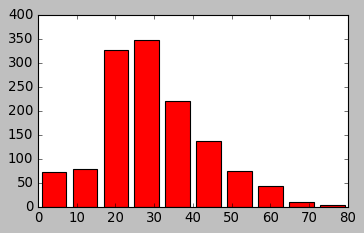

In [153]:
# your code here
tita_num

plt.figure(figsize=(5,3))
plt.hist(tita_num.Age, color='red', rwidth=.8)
plt.ylim(0,400)
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

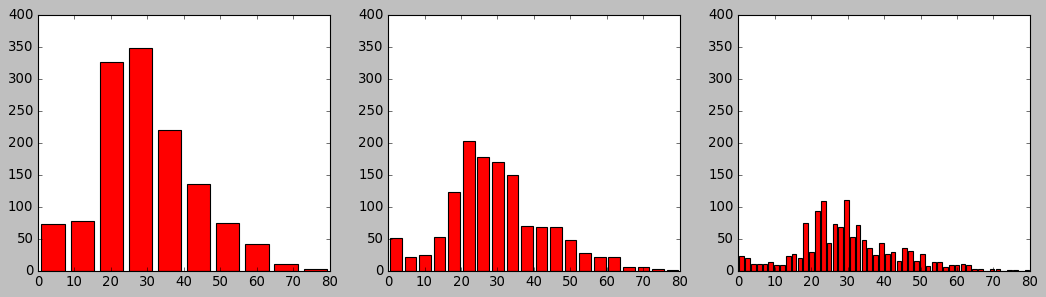

In [129]:
# your code here
plot_options, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize= (16,4))

ax1.hist(tita_num.Age, 10, color='red', rwidth=.8)
ax1.set_ylim(0,400)

ax2.hist(tita_num.Age, 20, color='red', rwidth=.8)
ax2.set_ylim(0,400)

ax3.hist(tita_num.Age, 50, color='red', rwidth=.8)
ax3.set_ylim(0,400)

plt.show()

#### How does the bin size affect your plot?

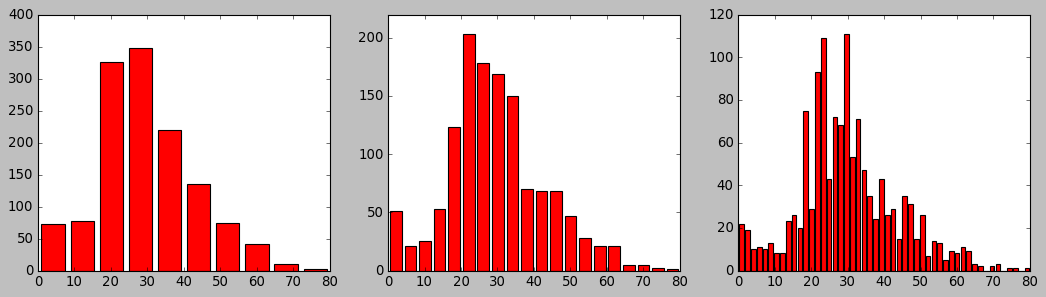

In [130]:
"""
your comments here
Chenging the bins size changes the number of element in each bin, and the y axis changes 
consequently. The visual effect is that the data also changes, as in the second and third plots 
the values as lower. To avoid a misinterpretation of the data we should also change the scale
when we change the size of the bins, aas follow.
"""
plot_options, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize= (16,4))

ax1.hist(tita_num.Age, 10, color='red', rwidth=.8)
ax1.set_ylim(0,400)

ax2.hist(tita_num.Age, 20, color='red', rwidth=.8)
ax2.set_ylim(0,220)

ax3.hist(tita_num.Age, 50, color='red', rwidth=.8)
ax3.set_ylim(0,120)

plt.show()

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

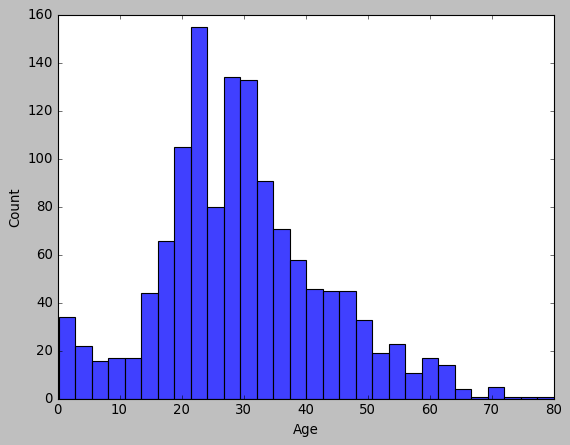

In [131]:
# your code here
sns.histplot(tita_num.Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [156]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


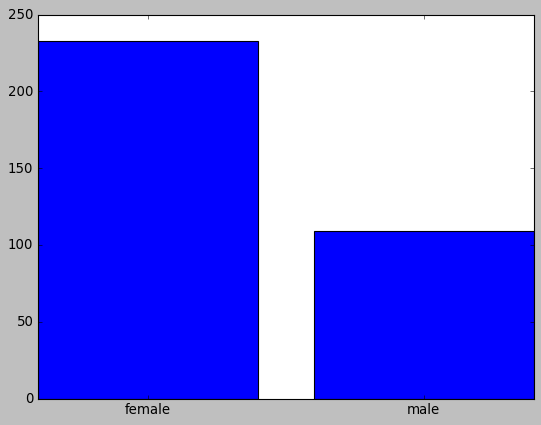

In [170]:
# your code here

tit_gender = titanic.groupby('Gender').agg({'Survived':'sum'}).reset_index()

# Method 1 - matplotlib
plt.bar(tit_gender.Gender, tit_gender.Survived)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

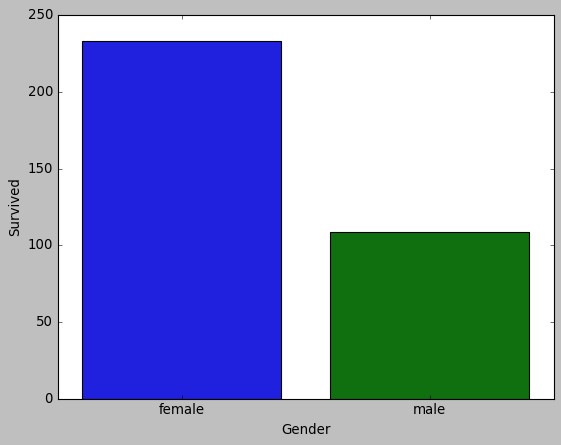

In [176]:
# Method 2 - seaborn
# your code here
sns.barplot(x='Gender', y='Survived', data = tit_gender)
plt.show

#### Use the right plot to visualize the column `Pclass`.

<function matplotlib.pyplot.show(close=None, block=None)>

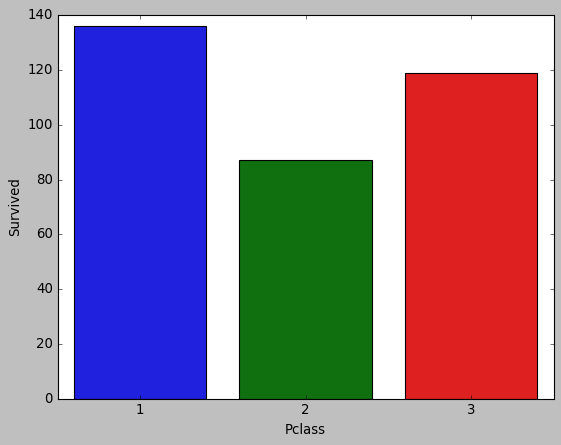

In [175]:
# your code here
tit_class = titanic.groupby('Pclass').agg({'Survived':'sum'}).reset_index()

sns.barplot(x='Pclass', y='Survived', data = tit_class)
plt.show

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

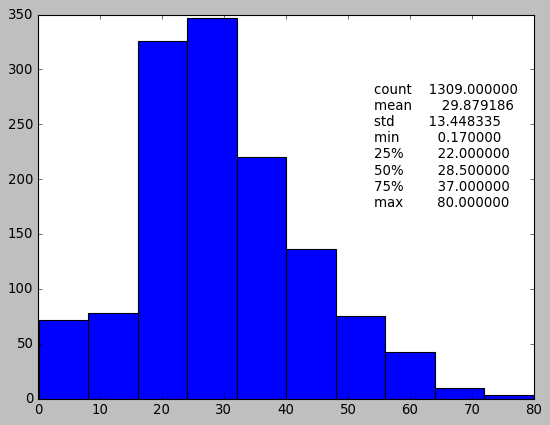

In [205]:
# your code here
fig, ax = plt.subplots()
ax.hist(titanic['Age'])
plt.figtext(0.65,0.5, titanic.Age.describe().to_string())
plt.show()

#### What does the last plot tell you about the feature `Age`?

In [206]:
"""
your comments here
The Age follows a normal distribution. The ages are 1309 in total, they are
between 0.1 and 80, with a mean of almost 30 years.
"""

'\nyour comments here\nThe Age follows a normal distribution. The ages are 1309 in total, they are\nbetween 0.1 and 80, with a mean of almost 30 years.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [138]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [139]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

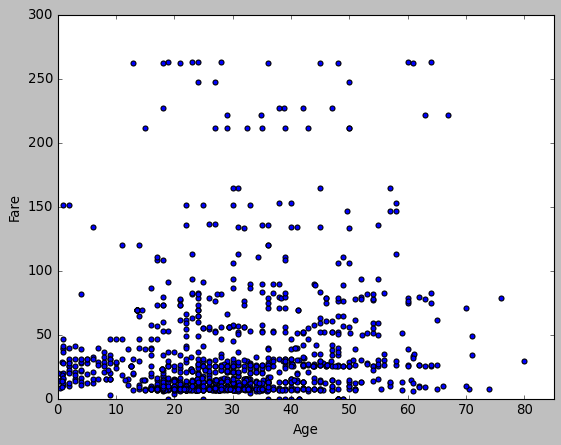

In [201]:
# Method 1 - matplotlib
# corr = titanic.Fare.corr(titanic.Age) 
# corr
# your code here
plt.scatter(titanic.Age, titanic.Fare)
plt.ylabel('Fare')
plt.xlabel('Age')
plt.ylim(0,300)
plt.xlim(0,85)
plt.show()

/Users/ceciliamezzera/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


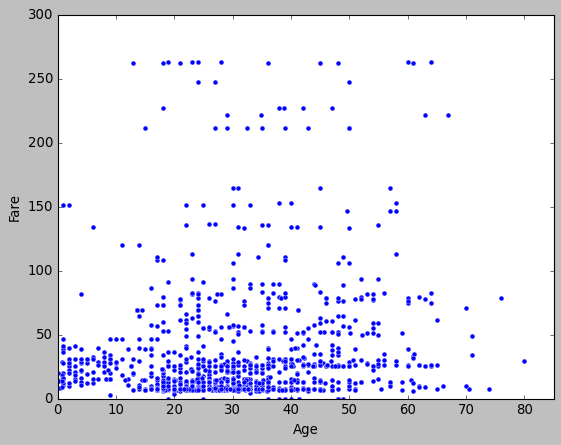

In [209]:
# Method 2 - seaborn
# your code here
sns.scatterplot(titanic.Age, titanic.Fare)
plt.ylim(0,300)
plt.xlim(0,85)
plt.show()

#### Plot the correlation matrix using seaborn.

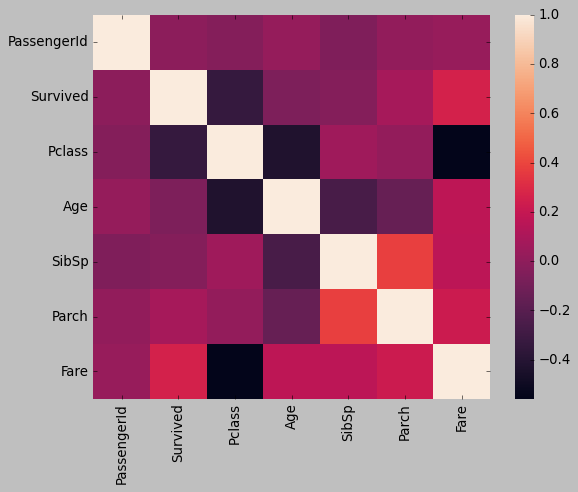

In [189]:
# your code here
sns.heatmap(tita_num.corr())
plt.show()

#### What are the most correlated features?

In [143]:
"""
your comments here
The most positively correlated features seem to be SibSp and Parch. However, if we look at the dataset, 
we realize this is not relevant, therefore we can discard this observation. After this, the most
correlated features are Survived and Fare, and this time the observation makes sense and it is
a relevant and informative observation, so we would explore the correlation further. Additinally,
we can observe that there are features that are higly correlated negatively, for example Pclass
and Fare, Pclass and Age, and Survived and Pclass. We would explore deeper also these correlations.
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

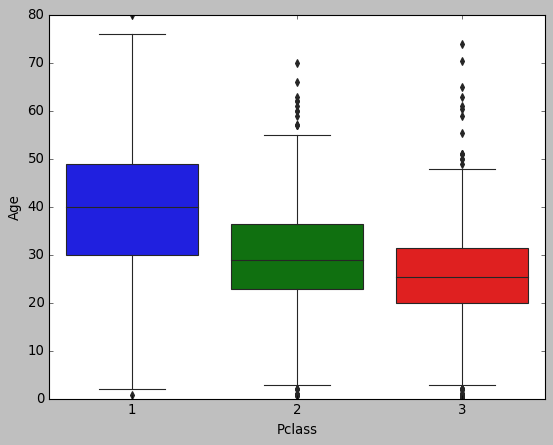

In [215]:
# your code here
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

/Users/ceciliamezzera/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


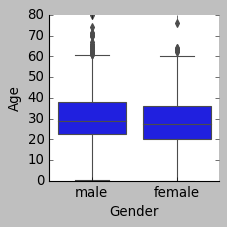

In [242]:
# your code here
g = sns.FacetGrid(titanic)
g.map(sns.boxplot, 'Gender', 'Age')

plt.show()

In [243]:
print('''
Done. 
There is a question I did not answer because I plotted the same plot in the previous cell,
so I was not sure about the question.
''')


Done. 
There is a question I did not answer because I plotted the same plot in the previous cell,
so I was not sure about the question.

